- Universidad de Guadalajara
- Centro Universitario de Ciencias Exactas e Ingenierías
- Seminario de Solución de Problemas de Inteligencia Artificial II
- Dr. Diego Oliva
- Depto. De Ciencias Computacionales
- Practica 1_3
- Perceptrón Simple y Multicapa

# Ejercicio 3:
Implementar el algoritmo de retropropagación para un perceptrón multicapa de forma
que se puedan elegir libremente la cantidad de capas de la red y la cantidad de neuronas para cada
capa.

In [1]:
import numpy as np
import random
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn import metrics 
from sklearn.model_selection import KFold # import KFold

### Función para graficar el modelo de clasificación

In [2]:
def MLP_binary_classification_2d(X,Y,net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0,i]==1:
            plt.plot(X[0,i], X[1,i], '.r')
        else:
            plt.plot(X[0,i], X[1,i], '.b')
    xmin, ymin=np.min(X[0,:])-0.5, np.min(X[1,:])-0.5
    xmax, ymax=np.max(X[0,:])+0.5, np.max(X[1,:])+0.5
    xx, yy = np.meshgrid(np.linspace(xmin,xmax, 100), 
                         np.linspace(ymin,ymax, 100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx,yy,zz, alpha=0.8, 
                 cmap=plt.cm.RdBu)
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid()
    plt.show()

### Funciones de activación para las capas ocultas y la de salida

In [3]:
# activation function for output layer
def linear(z, derivative=False):
    a = z.copy()
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
def logistic(z, derivative=False):
    a = 1/(1 + np.exp(-z))
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
def softmax(z, derivative=False):
    e = np.exp(z - np.max(z, axis=0))
    a = e / np.sum(e, axis=0)
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
# activation functions for hidden layers
def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a

def relu(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a

def logistic_hidden(z, derivative=False):
    a = 1/(1 + np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a

### Clase de red nueronal de múltiples capas

In [4]:
class MLP:
    def __init__(self, layers_dims, hidden_activation=tanh, output_activation=logistic):
        self.L = len(layers_dims) - 1
        self.w = [None] * (self.L + 1)
        self.b = [None] * (self.L + 1)
        self.f = [None] * (self.L + 1)
        # initialize weights
        for l in range(1, self.L + 1):
            self.w[l] = -1 + 2 * np.random.rand(layers_dims[l], layers_dims[l - 1])
            self.b[l] = -1 + 2 * np.random.rand(layers_dims[l], 1)
            if l == self.L:
                self.f[l] = output_activation
            else:
                self.f[l] = hidden_activation
    def predict(self, X):
        a = np.asanyarray(X)
        for l in range(1, self.L + 1):
            z = np.dot(self.w[l], a) + self.b[l]
            a = self.f[l](z)
        return a
    def train(self, X, Y, epochs=500, lr=0.1):
        P = X.shape[1]
        for _ in range(epochs):
            for p in range(P):
                # initialize activations
                a = [None] * (self.L + 1)
                da = [None] * (self.L + 1)
                lg = [None] * (self.L + 1)
                # propagation
                a[0] = X[:,p].reshape(-1,1)
                for l in range(1, self.L + 1):
                    z = np.dot(self.w[l], a[l-1]) + self.b[l]
                    a[l], da[l] = self.f[l](z, derivative=True)
                # backpropagation
                for l in range(self.L, 0, -1):
                    if l == self.L:
                        lg[l] = (y[:,p].reshape(-1,1) - a[l]) * da[l]
                    else:
                        lg[l] = np.dot(self.w[l+1].T, lg[l + 1]) * da[l]
                # gradient descent
                for l in range(1, self.L + 1):
                    self.w[l] += lr * np.dot(lg[l], a[l - 1].T)
                    self.b[l] += lr * lg[l]

# Ejercicio 3_1

1. Para entrenar y probar el algoritmo se debe usar el dataset concentlite.csv, el cual contiene
dos clases distribuidas de forma concéntrica (Figura 2). Debe representarse gráficamente con
diferentes colores el resultado de la clasificación hecha por el perceptrón multicapa.

2. Probar otra regla se aprendizaje o alguna modificación a la retropropagación.

## Dataset

In [7]:
concentlite_dataset = np.genfromtxt('concentlite.csv', delimiter=',')

In [8]:
X = concentlite_dataset[:,0:2]
y = concentlite_dataset[:,2]

In [9]:
X.shape

(833, 2)

In [10]:
y.shape

(833,)

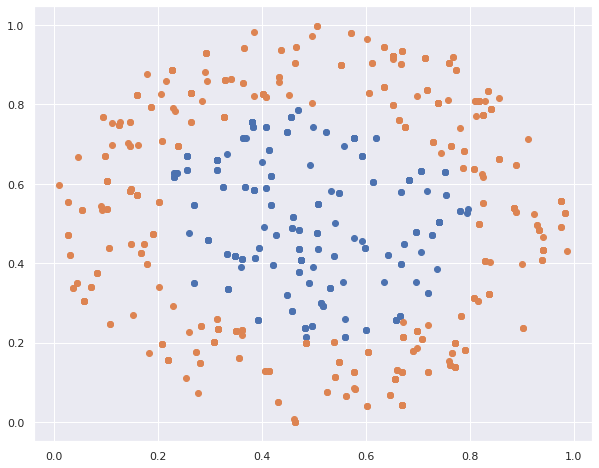

In [11]:
# Plotting
fig = plt.figure(figsize=(10,8))
plt.scatter(X[:, 0][y[:]==-1], X[:, 1][y[:]==-1])
plt.scatter(X[:, 0][y[:]==1], X[:, 1][y[:]==1])

## Perceptrón Multicapa

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle= True)

In [13]:
X_train.shape

(666, 2)

In [14]:
X_test.shape

(167, 2)

In [15]:
y_train.shape

(666,)

In [16]:
y_test.shape

(167,)

In [17]:
X_train = X_train.T
X_test = X_test.T
y_train = np.expand_dims(y_train, axis=0)
y_test = np.expand_dims(y_test, axis=0)

In [18]:
X_train.shape

(2, 666)

In [19]:
y_train.shape

(1, 666)

In [20]:
X_test.shape

(2, 167)

In [21]:
y_test.shape

(1, 167)

### Prueba 1
- hidden_activation = relu
- output_activation = logistic
- 100 capas
- 1000 epocas
- tasa de aprendizaje 0.01

X_train shape:  (2, 666) y_train shape:  (1, 666)
X_test shape:  (2, 167) y_test shape:  (1, 167)


/tmp/ipykernel_14955/1495947191.py:9: RuntimeWarning: overflow encountered in exp
  a = 1/(1 + np.exp(-z))


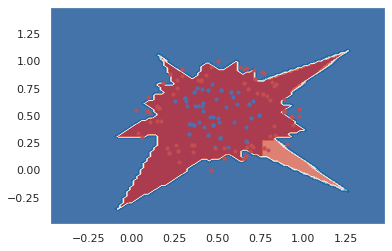

Error porcentual:  28.143712574850298


In [52]:
list_error_porcentual = []

print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)
# train
net = MLP((2,100,1),hidden_activation = relu, output_activation = logistic)    # test
net.train(X_train, y_train,  epochs=1000, lr=0.01)
# test
y_pred = net.predict(X_test)
y_pred = np.where(y_pred == 0., -1., y_pred)
y_pred = np.where(y_pred > 0, 1., y_pred)
aprox = (y_test == y_pred).sum()
error_porcentual = (abs(aprox - y_test.shape[1])/ y_test.shape[1])*100

MLP_binary_classification_2d(X_test,y_test,net)

print('Error porcentual: ', error_porcentual)


### Prueba 2
- hidden_activation = logistic_hidden
- output_activation = logistic
- 5 capas
- 1000 epocas
- tasa de aprendizaje 0.01

X_train shape:  (2, 666) y_train shape:  (1, 666)
X_test shape:  (2, 167) y_test shape:  (1, 167)


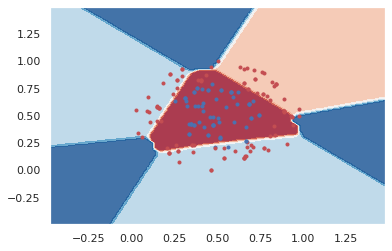

Error porcentual:  39.52095808383233


In [49]:
list_error_porcentual = []

print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)
# train
net = MLP((2,5,1),hidden_activation = logistic_hidden, output_activation = logistic)    # test
net.train(X_train, y_train,  epochs=1000, lr=0.01)
# test
y_pred = net.predict(X_test)
y_pred = np.where(y_pred == 0., -1., y_pred)
y_pred = np.where(y_pred > 0, 1., y_pred)
aprox = (y_test == y_pred).sum()
error_porcentual = (abs(aprox - y_test.shape[1])/ y_test.shape[1])*100

MLP_binary_classification_2d(X_test,y_test,net)

print('Error porcentual: ', error_porcentual)



### Prueba 3
- hidden_activation = relu
- output_activation = linear
- 500 capas
- 100 epocas
- tasa de aprendizaje 0.001

X_train shape:  (2, 666) y_train shape:  (1, 666)
X_test shape:  (2, 167) y_test shape:  (1, 167)


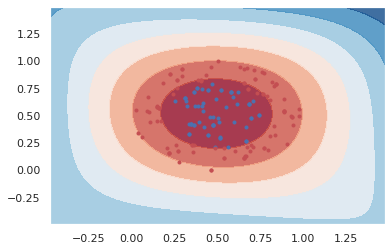

Error porcentual:  49.700598802395206


In [62]:
list_error_porcentual = []

print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)
# train
net = MLP((2,500,1),hidden_activation = relu, output_activation = linear)    # test
net.train(X_train, y_train,  epochs=100, lr=0.001)
# test
y_pred = net.predict(X_test)
y_pred = np.where(y_pred == 0., -1., y_pred)
y_pred = np.where(y_pred > 0, 1., y_pred)
aprox = (y_test == y_pred).sum()
error_porcentual = (abs(aprox - y_test.shape[1])/ y_test.shape[1])*100

MLP_binary_classification_2d(X_test,y_test,net)

print('Error porcentual: ', error_porcentual)



### Prueba 4
- hidden_activation = relu
- output_activation = linear
- 15 capas
- 5000 epocas
- tasa de aprendizaje 0.001

X_train shape:  (2, 666) y_train shape:  (1, 666)
X_test shape:  (2, 167) y_test shape:  (1, 167)


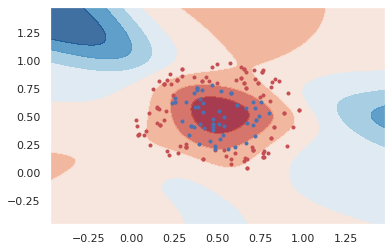

Error porcentual:  35.32934131736527


In [41]:
list_error_porcentual = []

print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)
# train
net = MLP((2,15,1),hidden_activation = relu, output_activation = linear)
net.train(X_train, y_train,  epochs=5000, lr=0.001)
# test
y_pred = net.predict(X_test)
y_pred = np.where(y_pred == 0., -1., y_pred)
y_pred = np.where(y_pred > 0, 1., y_pred)
aprox = (y_test == y_pred).sum()
error_porcentual = (abs(aprox - y_test.shape[1])/ y_test.shape[1])*100

MLP_binary_classification_2d(X_test,y_test,net)
print('Error porcentual: ', error_porcentual)



## Conclusiones

En esta práctica estuve experimentando con los diferentes hiperparámetros y funciones de activación. Algunas de estas combinaciones generaron patrones similares o muy singulares dependiendo de su configuración. Es importante mencionar que el modelo puede obtener mejores métricas al aprender de manea muy específica el problema, en la vida real hay casos de ruido o datos sesgados donde el modelo por su exactitud muy alta va a tener una peor evaluación. En cambio si el modelo cuenta con un rango de suavizado donde puede caber un margen de error, este se va a poder adaptar mejorar a nuevos datos. 
También aprendí que no importa si la complejidad es demasiado alta, no va a haber cambios significativos en las métricas de evaluación. De esta manera un modelo que no sea muy costoso computacionalmente puede competir en término de métricas con un modelo muy complejo y costoso. El punto importante es aprender a balancear las métricas, la sensibilidad a nuevos datos y su complejidad.